**Cleaning and Pre-Proccessing the Data**

In [1]:
#importing libraries 

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the data from my drive
#zero for negative tweets, 1 for positive ones

all_data = pd.read_csv("drive/Shared drives/CS166-FP-DATA/Part-1/training.1600000.processed.noemoticon.csv",header=None,
                 usecols=[0,5],names=['sentiment','text'],encoding = "ISO-8859-1")
all_data['sentiment'] = all_data['sentiment'].map({0: 0, 4: 1})
all_data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [3]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Removing punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]
    words = [w.replace('&amp;', '') for w in words]
    words = [w.replace('/', '') for w in words]
    words = [w.replace('[', '') for w in words]
    words = [w.replace(']', '') for w in words]
    
    # Removing numbers
    words = [w for w in words if not _isnum(w)]
    
    # Removing links
    words = [w for w in words if 'http' not in w]
        
    # Removing hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Removing mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Keeping words with more than 1 character
    words = [w for w in words if len(w) > 1]    
    w = " ".join(words)
    return w

#This Function was inspired from Mudium Post:https://towardsdatascience.com
#/analyzing-twitter-spheres-through-nlp-techniques-748b0df10b6c

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Funtion to pass each tweet into the clean words function and create a new list
def clean_tweets(df):
    new_text = []
    for i in range(len(df)):
        new_text.append(get_clean_words(df['text'].values[i].split()))
    all_data['Clean_Tweets'] = new_text

In [5]:
#visualizing the data after being cleaned 
clean_tweets(all_data)
all_data.head()

,sentiment,text,Clean_Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that's bummer shoulda got david carr thir...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it might c...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50% rest go...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",no behaving all i'm mad here can't see there


In [6]:
#Lemmatization

nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
tokenized_tweet = all_data['Clean_Tweets'].apply(lambda x: x.split())
#tokenized_tweet.head()

wl = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [wl.lemmatize(word=i, pos = wordnet.VERB) for i in x])
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    [awww, that's, bummer, shoulda, get, david, ca...
1    [upset, can't, update, facebook, texting, it, ...
2    [dive, many, time, ball, manage, save, 50%, re...
3               [whole, body, feel, itchy, like, fire]
4    [no, behave, all, i'm, mad, here, can't, see, ...
Name: Clean_Tweets, dtype: object

In [7]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
all_data['Clean_Tweets'] = tokenized_tweet
all_data.head()

,sentiment,text,Clean_Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that's bummer shoulda get david carr thir...
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it might c...
2,0,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save 50% rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",no behave all i'm mad here can't see there


**Model Visualization**

In [0]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [0]:
model_data=all_data.sample(n = 100000)

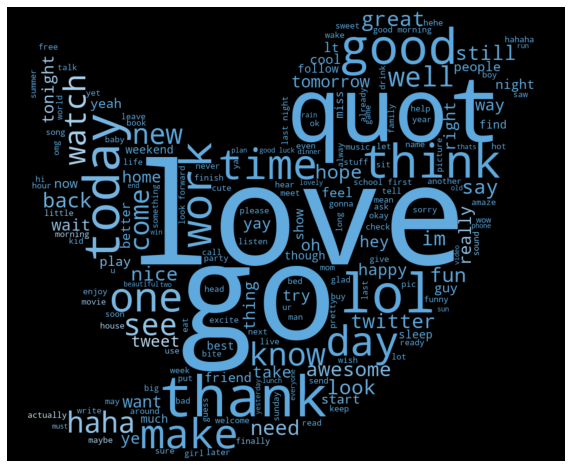

In [78]:
#One is all the positive words
all_words_positive = ' '.join(text for text in model_data['Clean_Tweets'][model_data['sentiment']==1])
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

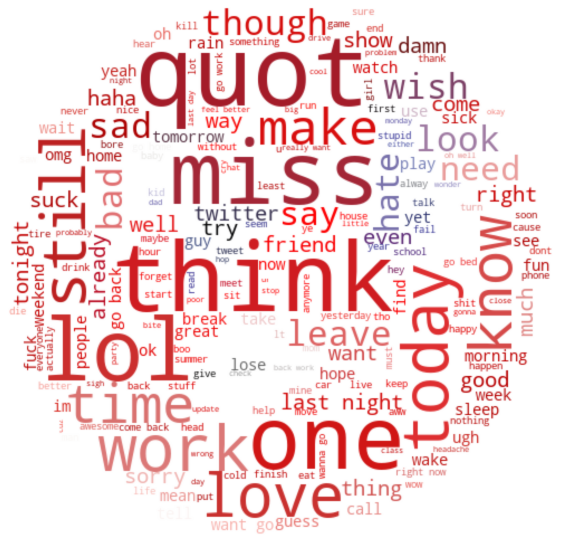

In [80]:
#Negative words:

all_words_negative = ' '.join(text for text in all_data['Clean_Tweets'][all_data['sentiment']==0])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/data_images/362062.jpg', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

**Prediction and Model Comparision**


In [0]:
from sklearn.model_selection import train_test_split
rann = 2000
x_train,x_test,y_train,y_test=train_test_split(
    model_data['Clean_Tweets'],model_data['sentiment'],
    test_size=0.1,random_state=rann)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# A function to provide the metrics scores for various classifiers
# The function uses bag-of-words vectorization feature extraction
def model_features_scores(classifier,x,y,linear=False):
  results=[]
  results_acc=[]
  features_range=np.arange(1000,5001,1000)
  for num in features_range:
    #building bag of words
    bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=num,
                                    stop_words='english')
    # bag-of-words feature matrix
    bow = bow_vectorizer.fit_transform(x)

    #getting the train part of the data
    train_bow = bow
    train_bow.todense()
    x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(
        train_bow,y,test_size=0.1,random_state=200)

    classifier.fit(x_train_bow,y_train_bow)
    if linear:
      prediction_bow = classifier.predict(x_valid_bow)
      prediction_int = prediction_bow
    else:
      prediction_bow = classifier.predict_proba(x_valid_bow)
      prediction_int = prediction_bow[:,1]>=0.3


    # if prediction is greater than or equal to 0.3 then 1 else 0
    # Where 0 is for negative sentiment tweets and 1 for positive sentiment tweets

    prediction_int = prediction_int.astype(np.int)

    # calculating f1 score and accuracy
    score = f1_score(y_valid_bow, prediction_int)
    results.append(score)
    accuracy = accuracy_score(y_valid_bow, prediction_int)
    results_acc.append(accuracy)
  
  return results,results_acc

In [101]:
#Fitting different classification algorithms and getting accuracy and 
#F-1 scores

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier

Log_Reg = LogisticRegression(solver='liblinear',random_state=200)
Log_bow_scores,Log_bow_accuracy=model_features_scores(Log_Reg,x_train,y_train)

XGB_model= XGBClassifier(learning_rate=0.9,random_state=200)
XGB_bow_scores,XGB_bow_accuracy=model_features_scores(XGB_model,x_train,y_train)

DT_model = DecisionTreeClassifier(criterion='entropy', random_state=200)
DT_bow_scores,DT_bow_accuracy=model_features_scores(DT_model,x_train,y_train)

SVC_Reg=LinearSVC(max_iter=2000,random_state=200)
SVC_bow_scores,SVC_bow_accuracy=model_features_scores(SVC_Reg,x_train,y_train,linear=True)

Ridge_Reg=RidgeClassifier(random_state=200)
Ridge_bow_scores,Ridge_bow_accuracy=model_features_scores(Ridge_Reg,x_train,y_train,linear=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

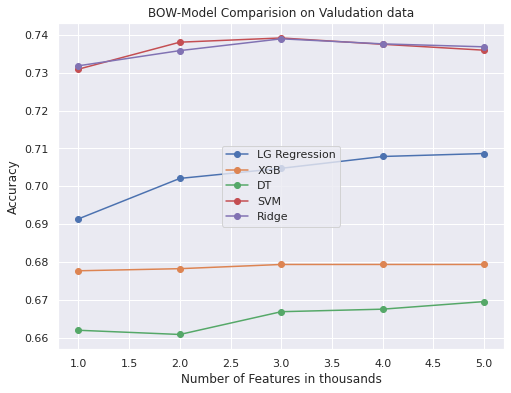

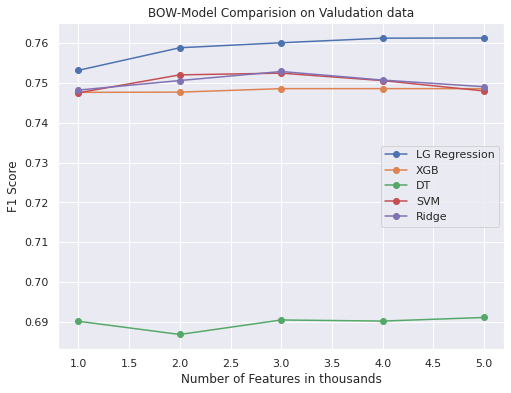

In [102]:
#Plotting different classification models performances
#over the bag of words features 

plt.figure(figsize=(8, 6))
plt.plot([*range(1,6,1)] ,Log_bow_accuracy,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_bow_accuracy,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_bow_accuracy,'o-',label='DT')
plt.plot([*range(1,6,1)] ,SVC_bow_accuracy,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_bow_accuracy,'o-',label='Ridge')

plt.title("BOW-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("Accuracy")
plt.legend()
plt.show

##################


plt.figure(figsize=(8, 6))

plt.plot([*range(1,6,1)] ,Log_bow_scores,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_bow_scores,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_bow_scores,'o-',label='DT')
plt.plot([*range(1,6,1)] ,SVC_bow_scores,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_bow_scores,'o-',label='Ridge')

plt.title("BOW-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# A function to provide the metrics scores for various classifiers
# The function uses TF-IDF vectorization feature extraction

def model_tfidf_features_scores(classifier,x,y,linear=False):
  results=[]
  results_acc=[]
  features_range=np.arange(1000,5001,1000)
  for num in features_range:
    #building tfidf matrix
    tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=num,stop_words='english')
    train_tfidf_matrix=tfidf.fit_transform(x)

    #getting the train part of the data
    #train_tfidf_matrix = tfidf_matrix
    train_tfidf_matrix.todense()
    x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf= train_test_split(
        train_tfidf_matrix,y,test_size=0.1,random_state=200)

    classifier.fit(x_train_tfidf,y_train_tfidf)
    if linear:
      prediction_tfidf = classifier.predict(x_valid_tfidf)
      prediction_int = prediction_tfidf
    else:
      prediction_tfidf = classifier.predict_proba(x_valid_tfidf)
      prediction_int = prediction_tfidf[:,1]>=0.3

    prediction_int = prediction_int.astype(np.int)

    # calculating f1 score and accuracy
    score = f1_score(y_valid_tfidf, prediction_int)
    results.append(score)
    accuracy = accuracy_score(y_valid_tfidf, prediction_int)
    results_acc.append(accuracy)
  
  return results,results_acc

In [0]:
#Fitting different classification algorithms and getting accuracy and 
#F-1 scores

Log_Reg = LogisticRegression(solver='liblinear')
Log_tfidf_scores,Log_tfidf_accuracy=model_tfidf_features_scores(Log_Reg,x_train,y_train)

XGB_model= XGBClassifier(learning_rate=0.9)
XGB_tfidf_scores,XGB_tfidf_accuracy=model_tfidf_features_scores(XGB_model,x_train,y_train)

DT_model = DecisionTreeClassifier(criterion='entropy')
DT_tfidf_scores,DT_tfidf_accuracy=model_tfidf_features_scores(DT_model,x_train,y_train)

SVC_Reg=LinearSVC(max_iter=2000,random_state=200)
SVC_tfidf_scores,SVC_tfidf_accuracy=model_tfidf_features_scores(SVC_Reg,x_train,y_train,linear=True)

Ridge_Reg=RidgeClassifier(random_state=200)
Ridge_tfidf_scores,Ridge_tfidf_accuracy=model_tfidf_features_scores(Ridge_Reg,x_train,y_train,linear=True)

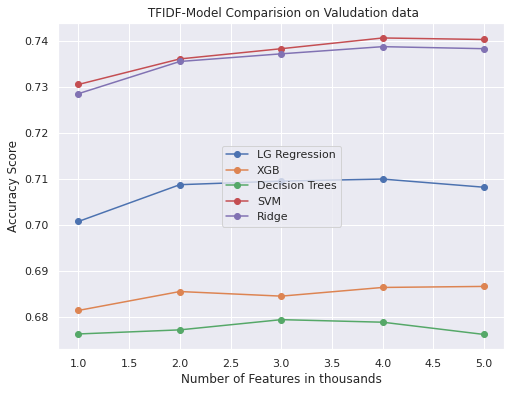

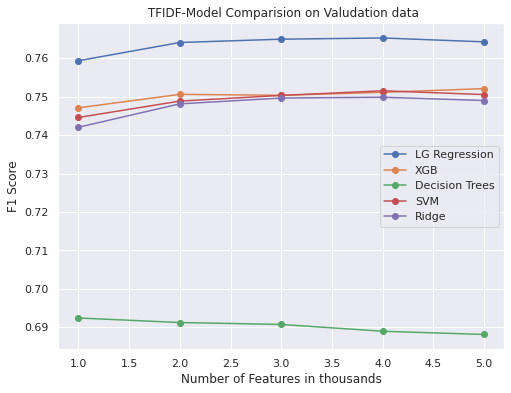

In [31]:
#Plotting different classification models performances
#over the bag of words features 

plt.figure(figsize=(8, 6))

plt.plot([*range(1,6,1)] ,Log_tfidf_accuracy,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_tfidf_accuracy,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_tfidf_accuracy,'o-',label='Decision Trees')
plt.plot([*range(1,6,1)] ,SVC_tfidf_accuracy,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_tfidf_accuracy,'o-',label='Ridge')

plt.title(" TFIDF-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

############################
plt.figure(figsize=(8, 6))


plt.plot([*range(1,6,1)] ,Log_tfidf_scores,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_tfidf_scores,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_tfidf_scores,'o-',label='Decision Trees')
plt.plot([*range(1,6,1)] ,SVC_tfidf_scores,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_tfidf_scores,'o-',label='Ridge')

plt.title(" TFIDF-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [34]:
results = {
    'LG Regression':[max(Log_bow_accuracy), max(Log_tfidf_accuracy)],
    'SVM':[max(SVC_bow_accuracy), max(SVC_tfidf_accuracy)],
    'Ridge':[max(Ridge_bow_accuracy),max(Ridge_tfidf_accuracy)],
    'XGB':[max(XGB_bow_accuracy), max(XGB_tfidf_accuracy)],
    'Decision Trees':[max(DT_bow_accuracy), max(DT_tfidf_accuracy)]

}
pd.DataFrame(results, index=['Bag-of-words Accuracy', 'TF-IDF Accuracy']).round(3)

,LG Regression,SVM,Ridge,XGB,Decision Trees
Bag-of-words Accuracy,0.709,0.739,0.739,0.679,0.670
TF-IDF Accuracy,0.710,0.741,0.739,0.687,0.679


In [35]:
# A summary of the model comparision plots
results = {
    'LG Regression':[max(Log_bow_scores), max(Log_tfidf_scores)],
    'SVM':[max(SVC_bow_scores), max(SVC_tfidf_scores)],
    'Ridge':[max(Ridge_bow_scores),max(Ridge_tfidf_scores)],
    'XGB':[max(XGB_bow_scores), max(XGB_tfidf_scores)],
    'Decision Trees':[max(DT_bow_scores), max(DT_tfidf_scores)]

}
pd.DataFrame(results, index=['Bag-of-words F-1 Score', 'TF-IDF F-1 Score']).round(3)

,LG Regression,SVM,Ridge,XGB,Decision Trees
Bag-of-words F-1 Score,0.761,0.752,0.753,0.749,0.691
TF-IDF F-1 Score,0.765,0.752,0.750,0.752,0.692


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
#Evaluating the test data
rann = 2000
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=5000,stop_words='english')
train_tfidf_matrix=tfidf.fit_transform(model_data['Clean_Tweets'])
#getting the train part of the data
#train_tfidf_matrix = tfidf_matrix
train_tfidf_matrix.todense()

x_train,x_vtest,y_train,y_vtest=train_test_split
(train_tfidf_matrix,model_data['sentiment'],test_size=0.2,random_state=rann)

x_test,x_valid,y_test,y_valid= train_test_split(
    x_vtest,y_vtest,test_size=0.5,random_state=200)


classifier = LinearSVC(max_iter=2000,random_state=200)
classifier.fit(x_train,y_train)
prediction_int = classifier.predict(x_test)
prediction_int = prediction_int.astype(np.int)

# Metrics
print("Accuracy Score on Test Data:",accuracy_score(y_test, prediction_int))
print("F-1 Score on Test Data:",f1_score(y_test, prediction_int))
print("-------------------------------------")
print("The model classification report:")
print(classification_report(y_test, prediction_int))
print("-------------------------------------")
print("The model confusion matrix:")
print(confusion_matrix(y_test, prediction_int))

Accuracy Score on Test Data: 0.7422
F-1 Score on Test Data: 0.7503389502227389
-------------------------------------
The model classification report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4931
           1       0.74      0.76      0.75      5069

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

-------------------------------------
The model confusion matrix:
[[3548 1383]
 [1195 3874]]


**GridsearchCV-SVM**

In [119]:
#from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {"C": [0.1,1,10,100]},cv=3, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print("Train Error:")
print(classification_report(y_train,gs.best_estimator_.predict(x_train)))
print("Test Error:")
print(classification_report(y_test,gs.best_estimator_.predict(x_test)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.3s finished


{'C': 0.1} 0.7399750064813233
Train Error:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     39834
           1       0.76      0.80      0.78     40166

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000

Test Error:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      4931
           1       0.74      0.77      0.76      5069

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Nueral Network**

In [38]:
seed = 200
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [88]:
#Building NN Model
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_dim=5000))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train,y_train
                  , validation_data=(x_valid, y_valid),
                  batch_size=30,
                  epochs=8,
                  verbose=1)

Train on 80000 samples, validate on 10000 samples
Epoch 1/8
80000/80000 [==============================] - 101s 1ms/step - loss: 0.5430 - accuracy: 0.7227 - val_loss: 0.5099 - val_accuracy: 0.7439
Epoch 2/8
80000/80000 [==============================] - 102s 1ms/step - loss: 0.4918 - accuracy: 0.7595 - val_loss: 0.5113 - val_accuracy: 0.7452
Epoch 3/8
80000/80000 [==============================] - 101s 1ms/step - loss: 0.4740 - accuracy: 0.7710 - val_loss: 0.5164 - val_accuracy: 0.7437
Epoch 4/8
80000/80000 [==============================] - 101s 1ms/step - loss: 0.4590 - accuracy: 0.7817 - val_loss: 0.5245 - val_accuracy: 0.7414
Epoch 5/8
80000/80000 [==============================] - 102s 1ms/step - loss: 0.4452 - accuracy: 0.7908 - val_loss: 0.5330 - val_accuracy: 0.7419
Epoch 6/8
80000/80000 [==============================] - 103s 1ms/step - loss: 0.4301 - accuracy: 0.8011 - val_loss: 0.5426 - val_accuracy: 0.7430
Epoch 7/8
80000/80000 [==============================] - 101s 1ms/st

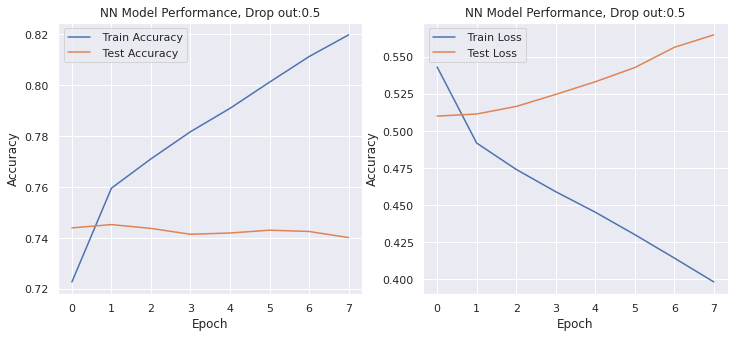

In [92]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model1.history.history['accuracy'], label=' Train Accuracy')
plt.plot(model1.history.history['val_accuracy'],label=' Test Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("NN Model Performance, Drop out:0.5")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(model1.history.history['loss'], label=' Train Loss')
plt.plot(model1.history.history['val_loss'],label=' Test Loss')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("NN Model Performance, Drop out:0.5")
plt.legend()

In [93]:
#Calculating the F-1 score of the data 
NNprediction=model1.predict(x_test)
NNprediction_int=[]
for i in NNprediction:
  if i >=0.3:
    NNprediction_int.append(1)
  else:
    NNprediction_int.append(0)

# Metrics
print("Accuracy Score on Test Data:",accuracy_score(y_test, NNprediction_int))
print("F-1 Score on Test Data:",f1_score(y_test, NNprediction_int))
print("-------------------------------------")
print("The model classification report:")
print(classification_report(y_test, NNprediction_int))
print("-------------------------------------")
print("The model confusion matrix:")
print(confusion_matrix(y_test, NNprediction_int))

Accuracy Score on Test Data: 0.718
F-1 Score on Test Data: 0.7626662178084498
-------------------------------------
The model classification report:
              precision    recall  f1-score   support

           0       0.83      0.54      0.65      4931
           1       0.67      0.89      0.76      5069

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.71     10000
weighted avg       0.75      0.72      0.71     10000

-------------------------------------
The model confusion matrix:
[[2649 2282]
 [ 538 4531]]
